<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [31]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




/tmp/ipykernel_300/3254100195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage['Age_numeric'] = dfage['Age'].map(convert_age_range)


<Axes: xlabel='Age_numeric', ylabel='JobSatPoints_6'>

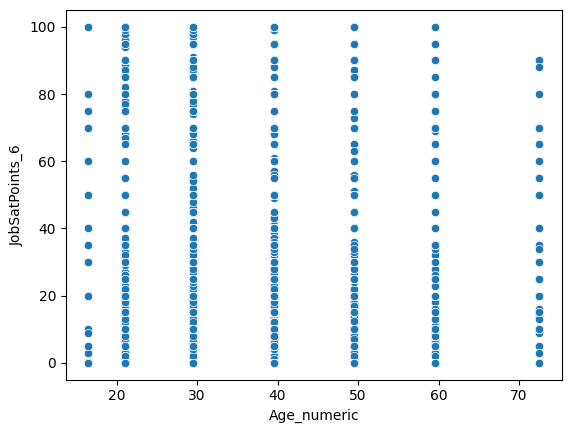

In [6]:
## Write your code here
import seaborn as sns 

df['Age'] = df['Age'].replace('Under 18 years old', '15-18 years old')
df['Age'] = df['Age'].replace('65 years or older', '65-80 years old')
dfage = df.loc[df.Age != 'Prefer not to say'] 
dfage.Age.unique() 

##Write your code here
def convert_age_range(age_range):
    ar = age_range.split('y')[0]
    start, end = map(int, ar.split('-'))
    return (start + end) / 2

# Step 2: Apply it to the Age column
dfage['Age_numeric'] = dfage['Age'].map(convert_age_range) 

sns.scatterplot(x="Age_numeric", y="JobSatPoints_6", data=dfage)

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


<Axes: xlabel='ConvertedCompYearly', ylabel='JobSatPoints_6'>

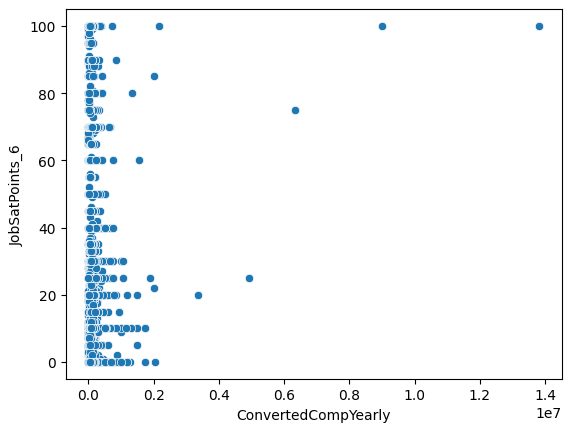

In [7]:
## Write your code here
sns.scatterplot(x="ConvertedCompYearly", y="JobSatPoints_6", data=df)

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


<Axes: xlabel='Age_numeric', ylabel='JobSatPoints_6'>

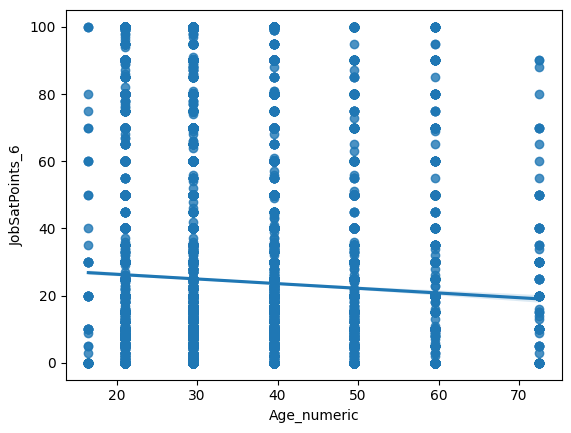

In [8]:
## Write your code here
sns.regplot(x="Age_numeric", y="JobSatPoints_6", data=dfage)

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


/tmp/ipykernel_300/1673280421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage.dropna(subset='YearsCodePro',inplace=True)
/tmp/ipykernel_300/1673280421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfage.YearsCodePro.replace('Less than 1 year', '1', inplace=True)
/tmp/ipykernel_300/1673280421.py:3: SettingWithCopyWarning: 
A val

<Axes: xlabel='Age_numeric', ylabel='YearsCodePro'>

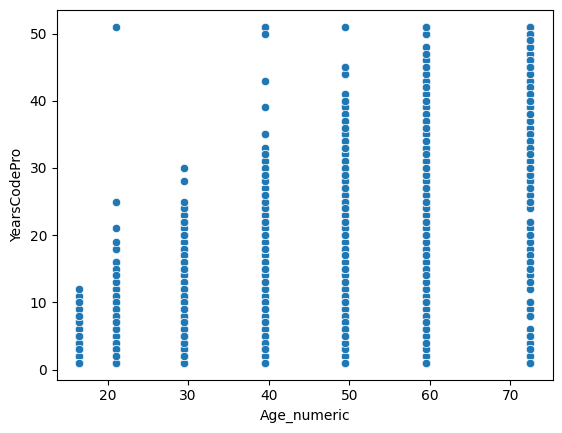

In [11]:
## Write your code here
dfage.dropna(subset='YearsCodePro',inplace=True)
dfage.YearsCodePro.replace('Less than 1 year', '1', inplace=True)
dfage.YearsCodePro.replace('More than 50 years', '51', inplace=True)
dfage.YearsCodePro.unique()

dfage['YearsCodePro'] = dfage.YearsCodePro.astype(int)
sns.scatterplot(x="Age_numeric", y="YearsCodePro", data=dfage)

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


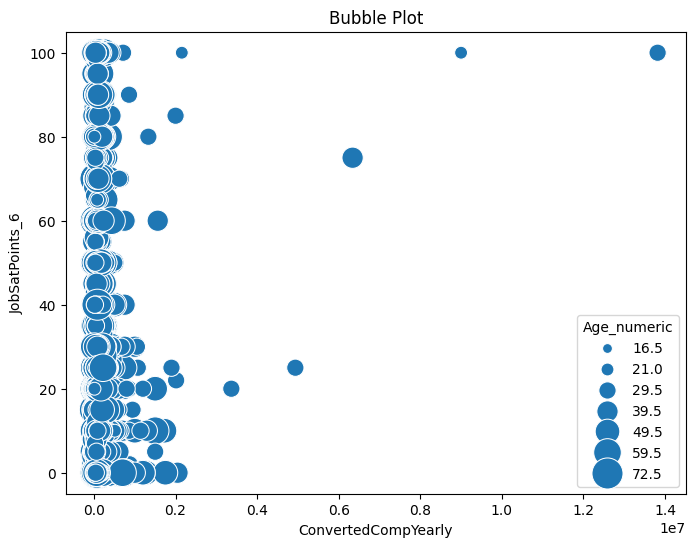

In [14]:
## Write your code here
plt.figure(figsize=(8, 6)) # Optional: set figure size
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', size='Age_numeric', data=dfage,
                    sizes=(50, 500), # Optional: set min and max bubble size
                    legend='full') # Optional: show legend for sizes
plt.title('Bubble Plot')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [17]:
df.LanguageHaveWorkedWith

1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
5        Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
                               ...                        
65421                       Bash/Shell (all shells);Python
65427                                    MATLAB;Python;SQL
65431    Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 59745, dtype: object

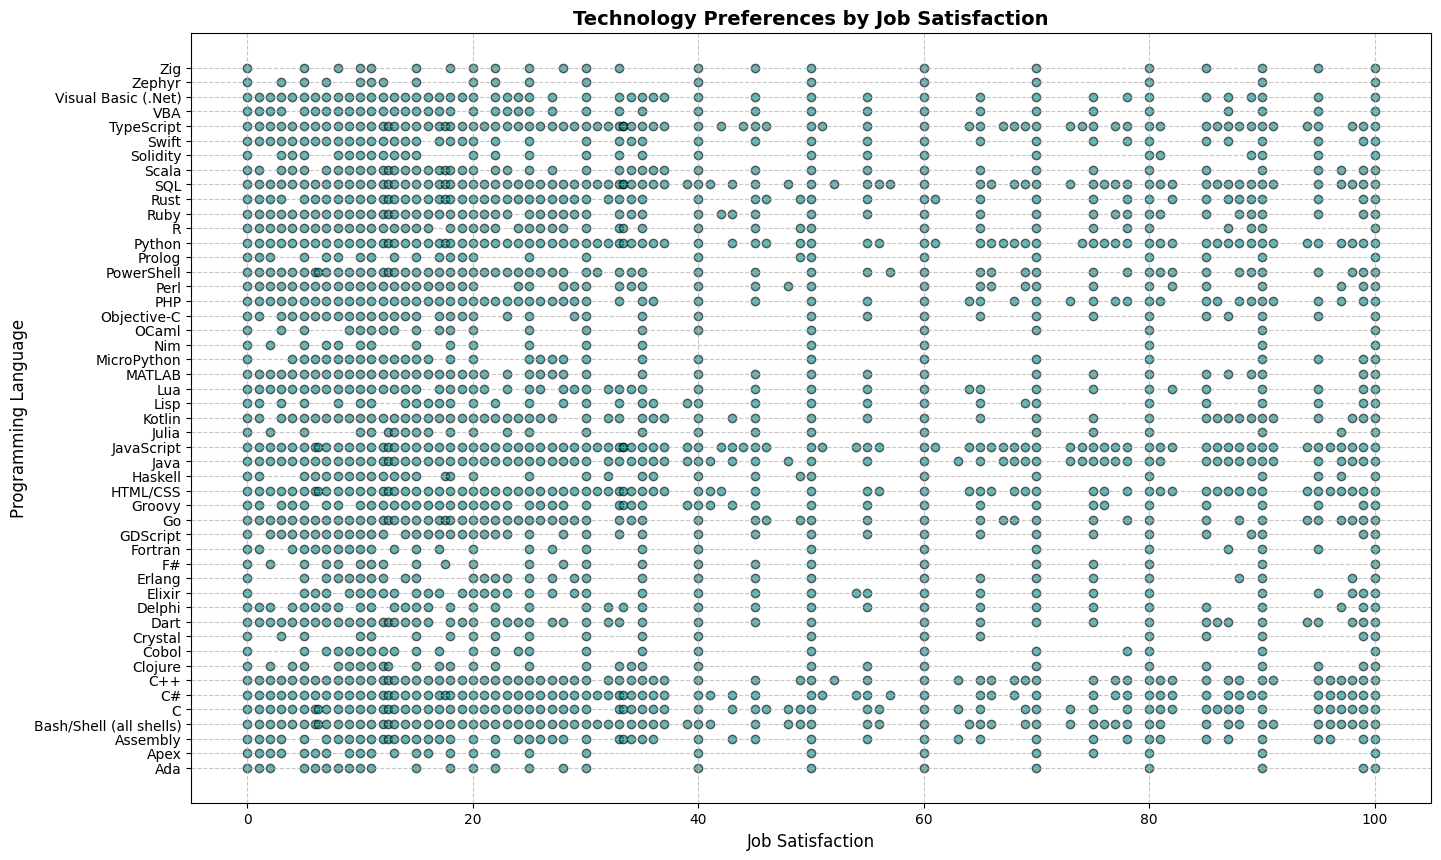

In [24]:
## Write your code here

df.dropna(subset=['LanguageHaveWorkedWith'], inplace=True)

# Step 2: Split languages and explode
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df = df.explode('LanguageHaveWorkedWith')

# Step 3: Remove whitespace from language names
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.strip()

language_satisfaction_group = df.groupby(['JobSatPoints_6', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')
language_satisfaction_group

plt.figure(figsize=(16, 10))
plt.scatter(language_satisfaction_group['JobSatPoints_6'], language_satisfaction_group['LanguageHaveWorkedWith'],
            alpha=0.6, c='teal', edgecolors='k')

# Step 7: Add labels and title
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.title('Technology Preferences by Job Satisfaction', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


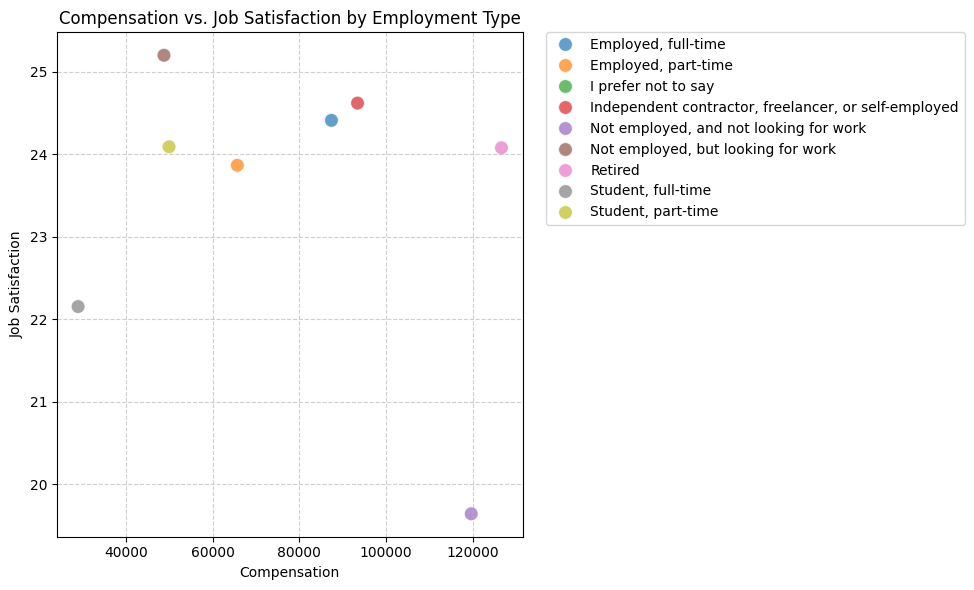

In [34]:
## Write your code here

df.dropna(subset=['Employment'], inplace=True)

# Step 2: Split languages and explode
df['Employment'] = df['Employment'].str.split(';')
df = df.explode('Employment')

# Step 3: Remove whitespace from language names
df['Employment'] = df['Employment'].str.strip()

newdf = df.groupby(['Employment'])[['ConvertedCompYearly', 'JobSatPoints_6']].mean()
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment', data=newdf, s=100, alpha=0.7)

# Add labels and title
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')

# Add a legend
plt.legend(title='Employment Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

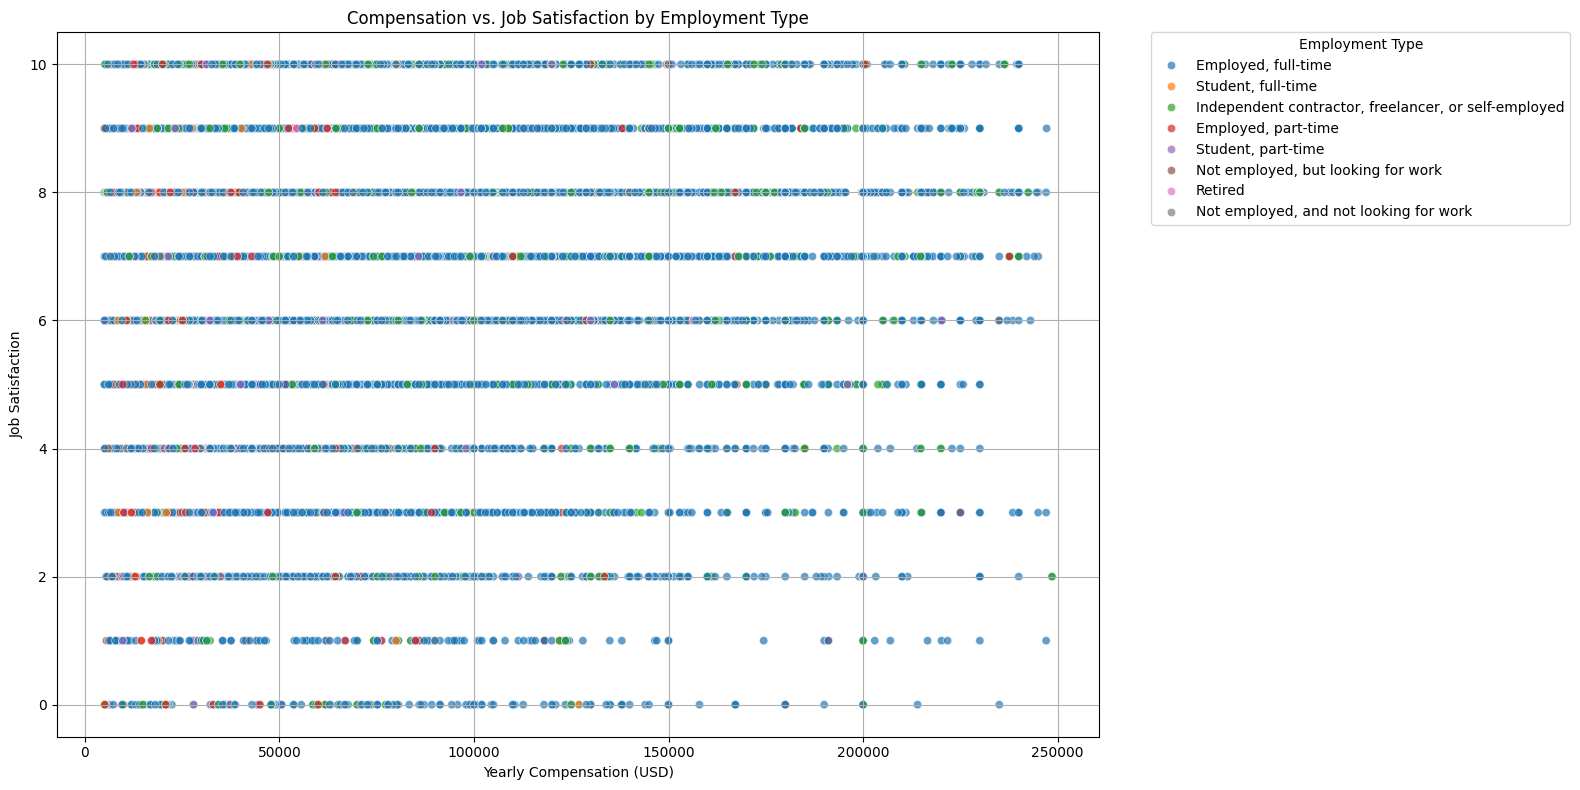

In [39]:
df_comp_sat_emp = df[['ConvertedCompYearly', 'JobSat', 'Employment']].dropna()
df_comp_sat_emp.value_counts()

df_comp_sat_emp['Employment'] = df_comp_sat_emp['Employment'].str.split(';')
df_comp_sat_emp = df_comp_sat_emp.explode('Employment')
df_comp_sat_emp['Employment'] = df_comp_sat_emp['Employment'].str.strip()

df_filtered_comp_sat_emp = df_comp_sat_emp[(df_comp_sat_emp['ConvertedCompYearly']>5000) & (df_comp_sat_emp['ConvertedCompYearly']<250000)].copy()

df_comp_sat_emp.value_counts()

plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_filtered_comp_sat_emp,
    x="ConvertedCompYearly",
    y="JobSat",
    hue="Employment",  # color by employment type
    alpha=0.7
)

plt.title("Compensation vs. Job Satisfaction by Employment Type")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")

# Move legend to the right
plt.legend(
    title="Employment Type",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    borderaxespad=0.
)

plt.grid(True)
plt.tight_layout()  
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


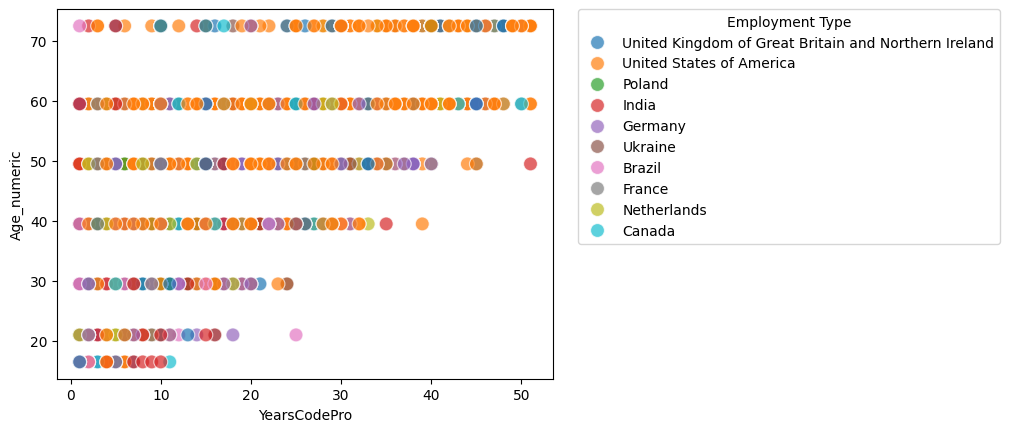

In [40]:
## Write your code here
top_countries = dfage['Country'].value_counts().head(10).index
df_filtered = dfage[dfage['Country'].isin(top_countries)]
df_filtered 

sns.scatterplot(y='Age_numeric', x='YearsCodePro', hue='Country', data=df_filtered, s=100, alpha=0.7)
plt.legend(
    title="Employment Type",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    borderaxespad=0.
)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
